# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [10]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.003
-0.002
-0.002
-0.004
-0.004
0.0
-0.002
-0.002
-0.002
0.995
1.0
0.999
0.998
0.998
1.992
1.995
1.995
1.994
1.995
2.986
2.99
2.99
2.99
2.99
3.981
3.984
3.983
3.983
3.984
4.984
4.984
4.984
4.983
5.978
5.982
5.982
5.98
5.981
6.709
6.714
6.714
6.713
6.713
7.446
7.448
7.448
7.448
7.45
8.448
8.452
8.452
8.451
8.451
8.451
9.452
9.452
9.45
9.452
10.448
10.453
10.452
10.451
10.451
11.445
11.449
11.449
11.449
11.448
12.444
12.448
12.448
12.447
12.448
13.438
13.442
13.442
13.441
13.442
14.132
14.134
14.136
14.135
14.135
14.824
14.827
14.828
14.828
14.828
15.828
15.828
15.828
15.827
16.826
16.825
16.825
16.824
17.825
17.825
17.824
17.823
18.815
18.815
18.815
18.814
19.807
19.812
19.812
19.811
19.812
20.807
20.811
20.811
20.81
21.454
21.459
21.458
21.457
22.105
22.105
22.104
22.104
23.107
23.106
23.105
23.105
24.106
24.106
24.105
24.104
25.097
25.096
25

57.116
57.115
57.115
57.374
57.374
57.374
57.374
57.374
57.374
57.396
57.396
57.396
57.396
57.396
57.395
57.394
57.394
57.394
57.394
57.394
57.396
57.394
57.394
57.394
57.393
57.392
57.392
57.392
57.392
57.392
57.391
57.391
57.391
57.391
57.391
57.391
57.39
57.389
57.39
57.39
57.39
57.39
57.389
57.389
57.389
57.389
57.389
57.39
57.39
57.39
57.39
57.39
57.389
57.389
57.389
57.388
57.388
57.431
57.474
57.516
57.516
57.559
57.578
57.578
57.578
57.578
57.577
57.577
57.596
57.596
57.596
57.596
57.595
57.595
57.595
57.595
57.595
57.594
57.597
57.596
57.595
57.595
57.595
57.595
57.593
57.593
57.593
57.593
57.593
57.593
57.593
57.592
57.59
57.59
57.59
57.59
57.59
57.589
57.589
57.589
57.589
57.589
57.589
57.59
57.59
57.59
57.59
57.59
57.59
57.59
57.59
57.59
57.59
57.59
57.78
57.779
57.779
57.779
57.779
57.779
57.762
57.776
57.8
57.8
57.8
57.8
57.801
57.801
57.801
57.801
57.801
57.801
57.8
57.8
57.799
57.799
57.798
57.798
57.798
57.798
57.798
57.798
57.798
57.797
57.797
57.797
57.797
57.797
57.

KeyboardInterrupt: 

In [11]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [12]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1461,2922,59.555
1462,2924,59.555
1463,2926,59.555
1464,2928,59.555


<IPython.core.display.Javascript object>


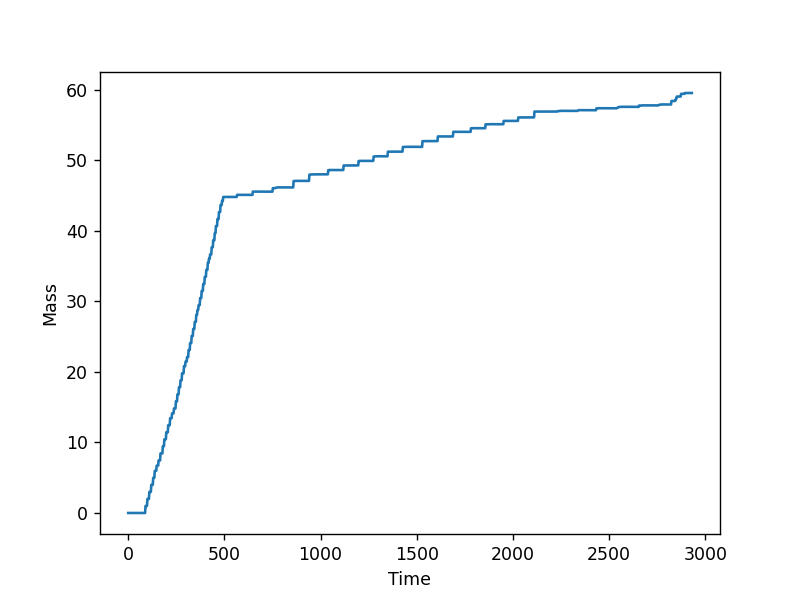

In [13]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [14]:
mass_df.to_csv('mass_data/MassProfile_040523_S367-372.csv')